**A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.**

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

**Dataset is weather time series dataset recorded by the Max Planck Institute for Biogeochemistry.**

**The dataset contains 14 different features such as air temperature, atmospheric pressure and humidity.**

**These were collected every 10 minutes, beginning in 2003.**

**We will use data collected between 2009 and 2016.**

**tf.keras.utils.get_file Downloads a file from a URL if it not already in the cache.**


**Name of the data file is 'jena_climate_2009_2016.csv.zip'**


**tf.keras.utils.get_file Arguments:**

1) fname - Name of the file. If an absolute path is specified the file will be saved at that location. If None, the name of the file at origin will be used.

2) origin - Original URL of the file.







In [ ]:
# Dataset is weather time series dataset recorded by the Max Planck Institute for Biogeochemistry.
# The dataset contains 14 different features such as air temperature, atmospheric pressure, 
# and humidity. These were collected every 10 minutes, beginning in 2003. We will use data 
# collected between 2009 and 2016. 

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


**There are 14 features in the dataset:**

p (mbar) -> Atmospheric pressure in millibars

T (degC) -> Temperature in Celsius

Tpot (K) -> Temperature in Kelvin

Tdew (degC) -> Temperature in Celsius relative to humidity

rh (%) -> Relative Humidity

VPmax (mbar) -> Saturation vapor pressure

VPact (mbar) -> Vapor pressure

VPdef (mbar) -> Vapor pressure deficit

h (g/kg) -> Specific humidity

H2OC (mmol/mol) -> Water vapor concentration

rho (g/m**3) -> Airtight

wv (m/s) -> Wind speed

max. wv (m/s) -> Maximum wind speed

wd (deg) -> Wind direction in degrees

In [ ]:
#Reading the Dataframe
df = pd.read_csv(csv_path)
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


**We are going to deal with hourly predictions, so start by sub-sampling the data from 10-minute intervals to one-hour intervals**

In [ ]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

**Converting the 'Date Time' column to pandas datetime object and removing the column from the dataframe and storing it into a series as date_time**

**We cannot perform any time series based operation on the dates if they are not in the right format. In order to be able to work with it, we are required to convert the dates into the datetime format.**



In [ ]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


**Plotting Temperature, Pressure and Density**

**Also plotting a subset of points of these features to get a zoomed view of their respective variations with time, we are taking the first 480 rows of these features**

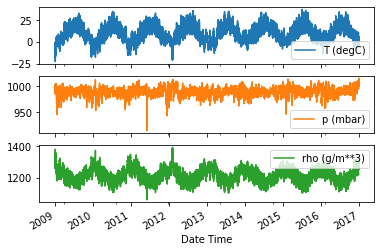

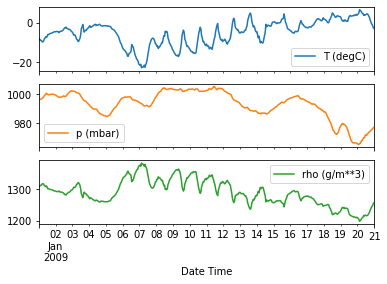

In [ ]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


**After doing df.describe() we observe that:**

1)**Min value of the wind velocity (wv (m/s)) and the maximum value 
  (max. wv (m/s)) columns is -9999. It is likely erroneous.**

2)**There's a separate wind direction column, so the velocity should be greater than zero (>=0).** 

3)**We replace these with zeros**.


In [ ]:
# min value of the wind velocity (wv (m/s)) and the maximum value (max. wv (m/s)) columns
# is -9999. It is likely erroneous.
# There's a separate wind direction column, so the velocity should be greater than zero (>=0). 
# Replace it with zeros

wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

In [ ]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,2.130539,3.533671,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,1.543098,2.343417,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


**Before diving in to build a model, it's important to understand your data and be sure that we are passing the model appropriately formatted data.**

**The last column of the data, wd (deg)—gives the wind direction in units of degrees and Angles do not make good model inputs: 360° and 0° should be close to each other and wrap around smoothly.**

**Direction shouldn't matter if the wind is not blowing.**

Text(0, 0.5, 'Wind Velocity [m/s]')

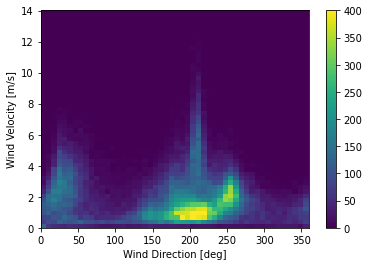

In [ ]:
# Before diving in to build a model, it's important to understand your data and be sure that 
# you're passing the model appropriately formatted data.

# The last column of the data, wd (deg)—gives the wind direction in units of degrees. 
# Angles do not make good model inputs: 360° and 0° should be close to each other and wrap 
# around smoothly. Direction shouldn't matter if the wind is not blowing.

plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

**We convert the win direction and velocity columns to a wind vector for better representation for our model.**

**We convert angles in degrees to radians by multipying it with pi/180.**

**We then calculate the horizontal and vertical conponents(X and Y) foe 'wind' and 'max wind' columns**

**We are removing the 'wv (m/s)' ,'max. wv (m/s)' and 'wd (deg)' columns from the dataframe and adding 'Wx','Wy', 'max Wx' and 'max Wy' into our dataframe for a better representation**

In [ ]:
# Convert the wind direction and velocity columns to a wind vector for better interpretation

wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

**After the above conversion we then plot X component of the wind and Y component of the wind**

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

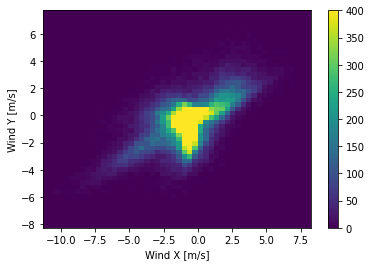

In [ ]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

**Converting our date time series to list and printing the first 10 elements**

In [ ]:
dt = date_time.tolist()
print(dt[0:10])
print(type(dt[0]))

[Timestamp('2009-01-01 01:00:00'), Timestamp('2009-01-01 02:00:00'), Timestamp('2009-01-01 03:00:00'), Timestamp('2009-01-01 04:00:00'), Timestamp('2009-01-01 05:00:00'), Timestamp('2009-01-01 06:00:00'), Timestamp('2009-01-01 07:00:00'), Timestamp('2009-01-01 08:00:00'), Timestamp('2009-01-01 09:00:00'), Timestamp('2009-01-01 10:00:00')]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**We convert date and time to seconds**

**Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.**

In [ ]:
# Convert date and time to seconds

timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

**Similar to the wind direction, the time in seconds is not a useful model input**

**Being weather data, it has daily and yearly periodicity.**

**There are many ways we could deal with periodicity.**

**we can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals**


**Or we could use periodic activation functions without applying sinusoidal encoding. Networks with non-periodic activation fail to predict time series.**

***


**Explanation:**

**In simple terms, without this transformation the network doesn't know that 2022-01-01 data likely correlates with the January 1st on previous (and future!) years. And actually it is likely to also correlate with January 3rd, and maybe even December 29th.**

**It is also possible to encode the day of year as float between 0.0 and 1.0 (first day of year and last day of year), and that would also provide this "correlation" information. However it isn't as good, since 2021-12-31 would have a value of 1.0, very far from the next day's 2022-01-01 value of 0.0.**


**Yet an other option is to treat the day of year as a categorical value between 1 and 365 (except on leap years, which is annoying). This would provide some degree of information, but it would lose the apriori knowledge that the 10th day of the year correlates more with the 11th than 100th.**

**So, splitting this to sine and cosine signals circumvents these issues.**

In [ ]:
# Similar to the wind direction, the time in seconds is not a useful model input. 
# Being weather data, it has daily and yearly periodicity. 
# There are many ways you could deal with periodicity.
# You can get usable signals by using sine and cosine transforms to clear "Time of day" and 
# "Time of year" signals

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

**Plotting Time of day signal using 'Day sin' and 'Day cos'.**

**It is essential for the neural network to know about frequency of data and how sinusoidal encoding could make it easier for the neural network to predict highly varying patterns inside data.**

Text(0.5, 1.0, 'Time of day signal')

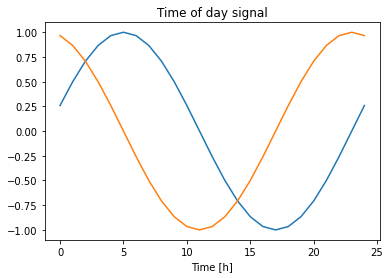

In [ ]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

**We are taking Real-valued fast Fourier transform on the Temperature column
('T (degC)')**

**Fourier transform (FT) decomposes a time-domain function into the frequency domain. Simply put, signal in the time domain is decomposed into its constituent frequencies and amplitude. Mathematically, FT involves taking the integral of a complex number notation**

**Computes the 1-dimensional discrete Fourier transform of a real-valued signal over the inner-most dimension of input.**

**Since the DFT of a real signal is Hermitian-symmetric, RFFT only returns the fft_length / 2 + 1 unique components of the FFT: the zero-frequency term, followed by the fft_length / 2 positive-frequency terms.**

**Along the axis RFFT is computed on, if fft_length is smaller than the corresponding dimension of input, the dimension is cropped. If it is larger, the dimension is padded with zeros.**

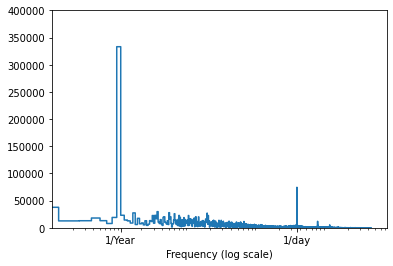

In [ ]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

**We are splitting the data into 70%, 20% and 10% for the training, validation, and test sets respectivily**

**We dont split the data randomly as it will destroy the temporal nature or structure of the data**

**So inorder to maintain the temporal structure of the data we dont randomly shuffle the data before splitting**

**These are the main two reasons:**

**a) It ensures that chopping the data into windows of consecutive samples is still possible.**

**b) It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.**


In [ ]:
# Use a (70%, 20%, 10%) split for the training, validation, and test sets. 
# Here, the data is not being randomly shuffled before splitting. 
# This is for two reasons:
# a) It ensures that chopping the data into windows of consecutive samples is still possible.
# b) It ensures that the validation/test results are more realistic, being evaluated on the 
#    data collected after the model was trained.

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

**We are standardizing the data(Train, Validation and Test sets)**

**Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.**

**Neural networks use Gradient descent as their optimization technique and they require data to be scaled**

**The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.**

**Having features on a similar scale can help the gradient descent converge more quickly towards the minima.**

In [ ]:
# Normalize the data

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
train_df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
count,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04,4.906300e+04
mean,1.807385e-16,-1.714699e-16,9.500357e-16,2.780592e-17,-6.812451e-16,-2.780592e-17,-2.548876e-16,-9.268641e-18,-1.204923e-16,1.853728e-16,-2.326429e-15,-7.183197e-17,5.792901e-17,-1.042722e-17,-3.939173e-17,-1.897175e-17,-2.684647e-17,9.268641e-18,-1.853728e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.045695e+00,-3.682079e+00,-3.707266e+00,-4.216645e+00,-3.746587e+00,-1.609554e+00,-2.030996e+00,-8.298612e-01,-2.022853e+00,-2.031986e+00,-3.846513e+00,-5.321263e+00,-5.048245e+00,-5.972942e+00,-5.410607e+00,-1.414169e+00,-1.414050e+00,-1.502697e+00,-1.382842e+00
25%,-6.093840e-01,-7.069026e-01,-6.939982e-01,-6.697392e-01,-6.581569e-01,-7.505257e-01,-7.786971e-01,-6.575813e-01,-7.762466e-01,-7.761335e-01,-7.116941e-01,-4.375161e-01,-6.242102e-01,-4.814777e-01,-6.182100e-01,-9.999460e-01,-9.998544e-01,-9.856843e-01,-1.010608e+00
50%,5.467421e-02,9.450477e-03,1.318575e-02,5.168967e-02,1.989686e-01,-2.228923e-01,-1.561120e-01,-3.835939e-01,-1.548152e-01,-1.540757e-01,-7.847992e-02,-1.597386e-02,7.420737e-02,-4.660022e-02,8.077215e-02,7.679677e-05,1.024151e-04,7.747715e-02,-1.470386e-02
75%,6.548575e-01,7.200265e-01,7.123465e-01,7.530390e-01,8.150841e-01,5.334687e-01,6.684569e-01,2.681639e-01,6.650251e-01,6.651626e-01,6.442168e-01,4.738166e-01,5.582518e-01,5.441849e-01,6.019162e-01,1.000100e+00,1.000059e+00,9.874267e-01,1.001990e+00
max,2.913378e+00,3.066661e+00,3.041354e+00,2.647686e+00,1.455361e+00,5.846190e+00,4.489514e+00,7.842254e+00,4.550843e+00,4.524268e+00,4.310438e+00,4.391051e+00,5.203526e+00,4.117034e+00,5.730397e+00,1.414323e+00,1.414255e+00,1.351906e+00,1.428505e+00


**Plotting the standardized features and they have zero mean and unit standard deviation**

**Few features seems to have larger range**

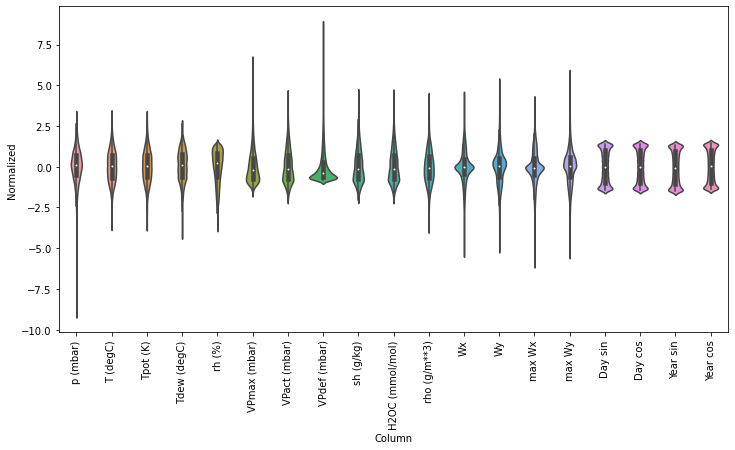

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
# Data windowing
# The main features of the input windows are: 
#   a) The width (number of time steps) of the input and label windows.'
#   b) The time offset between them.
#   c) Which features are used as inputs, labels, or both.
# Use the windowing approach for 
#   a) Single-output, and multi-output predictions.
#   b) Single-time-step and multi-time-step predictions.

**Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable.**

**We can see that the previous time step is the input (X) and the next time step is the output (y) in our supervised learning problem.
We can see that the order between the observations is preserved, and must continue to be preserved when using this dataset to train a supervised model.**

**The use of prior time steps to predict the next time step is called the sliding window method. For short, it may be called the window method in some literature.**

**(*)The number of previous time steps is called the 'input_width'.**

**(*)The number of label or future predictions to consider is called 'label_width'.**

**(*)The concept similar to stride over here is termed as 'shift'.**

**Univariate Time Series: These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.**

**Multivariate Time Series: These are datasets where two or more variables are observed at each time.**



In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

**Creating a time series windoow using WindowGenerator class**

**Input width is 24, so initial 24 data points will be taken into consideration(0 to 23) as our width.**

**label width is 1 and shift is 24**

**Our label column is Temperature('T (degC)')**

**Given the label width and shift, we are going to take the previous 24 observations, in our case the observations are of 1 hour, so when we take 24 observations that is nothing but 1 day data.**

**so we are going to take the 1 day observation and predict the next value which is the next day Temperature after 24 hours, as our stride that is shift is 24**

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

**Sinilarly**

**Input width is 6, so initial 6 data points will be taken into consideration(0 to 5) as our width.**

**label width is 1 and shift is 1**

**Our label column is Temperature('T (degC)')**

**Given the label width and shift, we are going to take the previous 6 observations, in our case the observations are of 1 hour, so when we take 6 observations that is nothing but 6 hpur data.**

**so we are going to take the 6 hour observation and predict the next value which is 7th hour observation, as our stride that is shift is 1**

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

**Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.**

In [ ]:
# Given a list of consecutive inputs, the split_window method will convert them to 
# a window of inputs and a window of labels.
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

**We are taking w2 whith label_columns='T (degC)'**

**we create 3 slices of windows, one from 1st observation to the 7th observation next one from 100th observation to 107th observation and last one from 200th observation to 207th observation**

**we then convert these 3 slices of windows to a numpy array**

**Then we stack all of these by tf.stack which Packs the list of tensors in values into a tensor with rank one higher than each tensor in values, by packing them along the axis dimension. Given a list of length N of tensors of shape (A, B, C)**

**It actually stacks a list of rank-R tensors into one rank-(R+1) tensor.**

**So our example_window is a rank 3 tensor with shape (3,7,19), that is 3 windows where each window has 7 timestamps or observations and 19 features**

**Then we apply split_window on example_window whcich will convert them to a window of inputs and a window of labels.**

**So after splitting , the inputs shape is (3,6,19) and the labels shape is 
(3,1,1)**

**Label shape is (3,1,1) because we have 3 windows, therefore for each window we have a corresponding label**

In [ ]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


**Plotting the corresponding 3 windows and their labels**

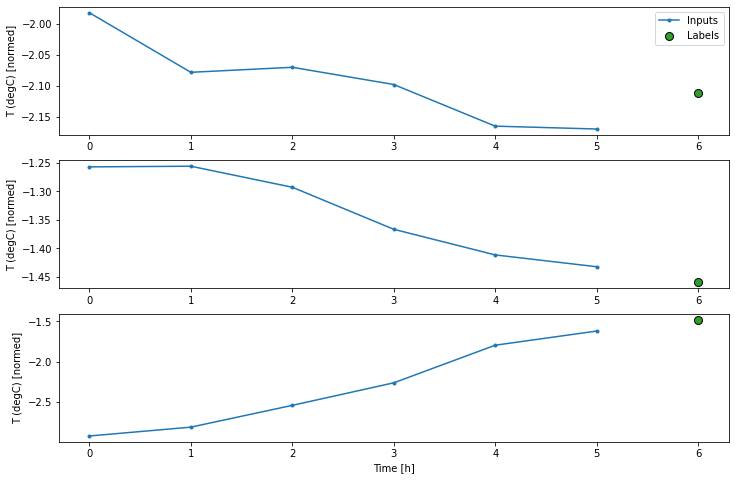

In [ ]:
w2.example = example_inputs, example_labels

def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

w2.plot()

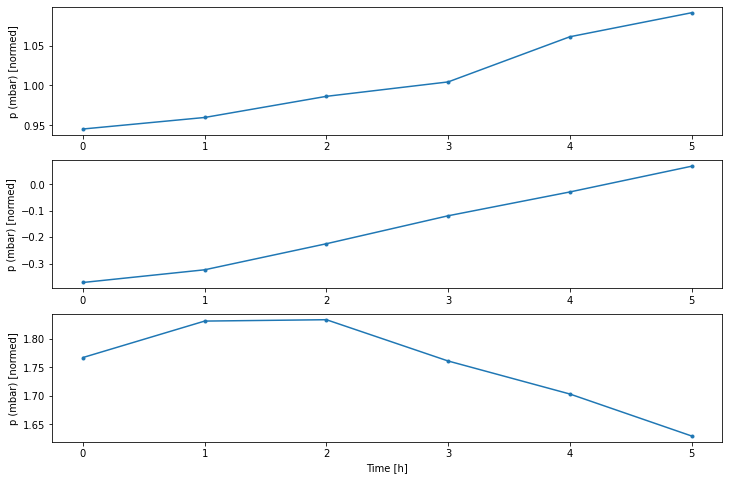

In [ ]:
w2.plot(plot_col='p (mbar)')

**The make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function**

**timeseries_dataset_from_array creates a dataset of sliding windows over a timeseries provided as array. This function takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as length of the sequences/windows, spacing between two sequence/windows, etc., to produce batches of timeseries inputs and targets.**



In [ ]:
# Finally, this make_dataset method will take a time series DataFrame and convert it to 
# a tf.data.Dataset of (input_window, label_window) pairs using the 
# tf.keras.utils.timeseries_dataset_from_array function

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

**Now each element is an (inputs, label) pair.**

In [ ]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

**When we iterate over the dataset it yields concrete batches with 32 batches, 6 timesteps/observations and 19 features**

**The labels shape is (32,1,1) as for each 32 batches we have 1 label as we earlier set label_width to be 1.**

In [ ]:
# Iterating over a Dataset yields concrete batches

for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


**A single step window is one in which it predicts a single feature's value one time step in our case one hour into the future based on the current conditions.**

**For single step model we will have input width, label width and shift to be 1**

**As we need to predict one value in the future we keep label_width to be 1, as we need immediate future value we keep shift to be 1 and we pass in the label column for which we want to make the prediction.** 

In [ ]:
# Single step models
# Predicts a single feature's value—1 time step (one hour) into the future based only 
# on the current conditions.

# Configure a WindowGenerator object to produce these single-step (input, label) pairs:

single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

**If we iterate over the dataset we will get 32 batches but the timestep or the observation will be on;y one as we are making a single step model so we provide input_width to be 1**

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


**In order to make the time axis acts like the batch axis each prediction is made independently with no interaction between time steps**

**So we keep the label width to be 24 along with the input width which is also 24 with shift 1.**

In [ ]:
# To make the time axis acts like the batch axis: 
# each prediction is made independently with no interaction between time steps:

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [ ]:
print('Input shape:', wide_window.example[0].shape)

Input shape: (32, 24, 19)


**We create neural network for prediction with only one dense layer with dimensionality of the output space as 1**

**As we dont pass any activation function it will be a linear model**

**Output shape is (32,1,1) as it will make prediction of each of the 32 batches.**

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


**We are compiling our model with loss function as MSE, optimizer as Adam and we MAE as our performance metric.**

**We run it for 100 epochs.**

**We incorporate early stopping to stop training when a monitored metric has stopped improving.**

In [ ]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [ ]:
history = compile_and_fit(linear, single_step_window)

print(linear.evaluate(single_step_window.val))
print(linear.evaluate(single_step_window.test, verbose=0))

Epoch 1/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.2863 - mean_absolute_error: 0.3272 - val_loss: 0.0293 - val_mean_absolute_error: 0.1322
Epoch 2/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.1079 - val_loss: 0.0105 - val_mean_absolute_error: 0.0759
Epoch 3/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0722 - val_loss: 0.0088 - val_mean_absolute_error: 0.0698
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0698 - val_loss: 0.0088 - val_mean_absolute_error: 0.0696
Epoch 5/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0697 - val_loss: 0.0087 - val_mean_absolute_error: 0.0698
Epoch 6/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0698 - val_loss: 0.0088 - val_mean_absolute_error: 0.069

In [ ]:
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

**Plotting the predictions on wide_window which has a window size of 25 by our linear model**

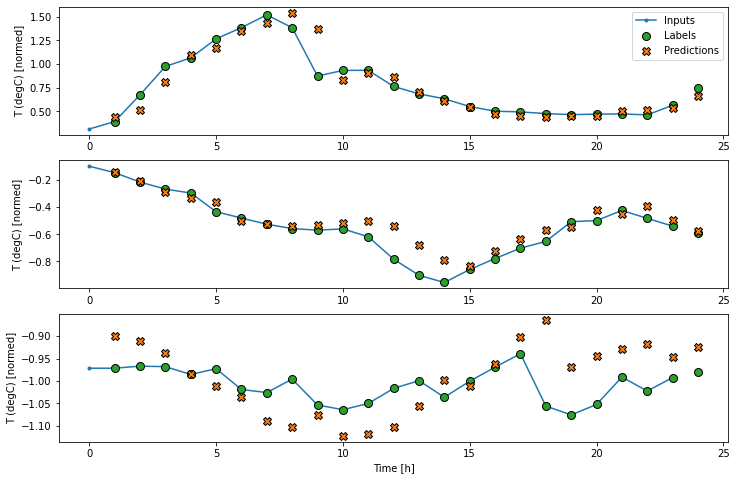

In [ ]:
wide_window.plot(linear)

**Next we are creating a dense neural network with 2 hidden layers with 64 neurons and 'relu' as activation functionm and the output with 1 neuron.**

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

Epoch 1/100
1534/1534 [==============================] - 9s 5ms/step - loss: 0.0154 - mean_absolute_error: 0.0796 - val_loss: 0.0085 - val_mean_absolute_error: 0.0673
Epoch 2/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0645 - val_loss: 0.0071 - val_mean_absolute_error: 0.0607
Epoch 3/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0620 - val_loss: 0.0078 - val_mean_absolute_error: 0.0638
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0609 - val_loss: 0.0069 - val_mean_absolute_error: 0.0597
Epoch 5/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0606 - val_loss: 0.0068 - val_mean_absolute_error: 0.0584
Epoch 6/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0591 - val_loss: 0.0067 - val_mean_absolute_error: 0.058

**As we can see the performance of this dense model is better than the linear model**

In [ ]:
print(dense.evaluate(single_step_window.test, verbose=0))

[0.006837159860879183, 0.060535699129104614]


**Creating new window called CONV_WIDTH with 3 as the input width, label width to be 1 and shift 1**

**So, far the past 3 timesteps or observation we predicting 1 hour into the future**

In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

**Plotting the 3 inputs in a window and their correspoding labels**

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

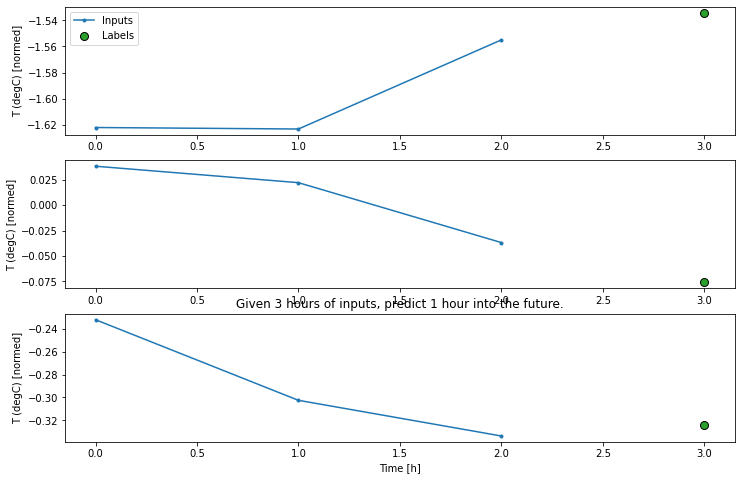

In [ ]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

**We are creating a deep neural network with 2 hidden layers consisting of 32 neurons each but unlike previous model we are passing a flatten layer input to the neural network**

**The flatten layer flattens the input. Does not affect the batch size.**

**The input shape will be (time*features) which will flattened**

In [ ]:
dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

**Our input shape is (32,3,19), as our input width is 3 and output shape is 
(32,1,1).**

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(dense, conv_window)

Epoch 1/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0990 - val_loss: 0.0112 - val_mean_absolute_error: 0.0791
Epoch 2/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0677 - val_loss: 0.0082 - val_mean_absolute_error: 0.0663
Epoch 3/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0628 - val_loss: 0.0071 - val_mean_absolute_error: 0.0602
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0602 - val_loss: 0.0083 - val_mean_absolute_error: 0.0666
Epoch 5/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0592 - val_loss: 0.0064 - val_mean_absolute_error: 0.0555
Epoch 6/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0582 - val_loss: 0.0061 - val_mean_absolute_error: 0.054

**Evaluating our model**

In [89]:
dense.evaluate(conv_window.test, verbose=0)

[1.3951075077056885, 0.8347547054290771]

**CNN model with 32 filters with kernal size as (3*3) and activation being 'relu', and after convoluiton we pass it to neural network for prediction which has 32 neurons.**

In [ ]:
# CNN

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

**The input and the output shape is same is before.**

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

Epoch 1/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0952 - val_loss: 0.0086 - val_mean_absolute_error: 0.0682
Epoch 2/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0650 - val_loss: 0.0078 - val_mean_absolute_error: 0.0644
Epoch 3/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0619 - val_loss: 0.0081 - val_mean_absolute_error: 0.0668
Epoch 4/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0598 - val_loss: 0.0085 - val_mean_absolute_error: 0.0674


**Model performance is not  same as before, there, previosuly created dense model performed slighlty better than this.**

In [ ]:
print(conv_model.evaluate(conv_window.test, verbose=0))

[0.009500950574874878, 0.07271033525466919]


In [ ]:
wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

**Previously created wide window with iput width 24 and label width also 24**

**If we pass into the cnn model the output shape is (32,22,1), but the output shape which we need is (32,24,1).**

**The output shape is shorter than the input, we need labels and the predictions to have the same length.**



In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


**So inorder to rectify the above problem that is problem of label and prediction not having the same length we bulid a window generator to produce wide windows with a few extra input observations or time steos so that the label and the prediction lengths match.**

**so we dont give input width to be 24, we add extra input which is (conv_width-1) along with the label width which is 24.**

In [ ]:
# Note that the output is shorter than the input. 
# To make training or plotting work, you need the labels, and prediction 
# to have the same length. 
# So build a WindowGenerator to produce wide windows with a few extra input 
# time steps so the label and prediction lengths match.

LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T (degC)']

**Now if we see the label width and the prediction which is the output width is matching.**

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


**Now we can pass wide window to our cnn model as the length problem is takem care of.**

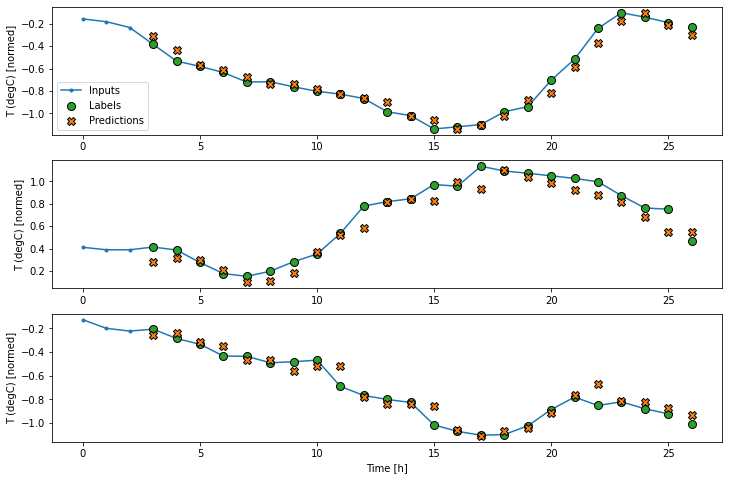

In [ ]:
wide_conv_window.plot(conv_model)

**Creating a LSTM model with 32 neurons and return_sequnces=True.**

**When return_sequences parameter is True, it will output all the hidden states of each time steps.**


In [ ]:
# LSTM

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

**Input and output shape of the wide window model which we are passing into the LSTM model.**

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


**Fitting or training the LSTM on the wide window which we created.**

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

Epoch 1/100
1533/1533 [==============================] - 26s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0772 - val_loss: 0.0063 - val_mean_absolute_error: 0.0556
Epoch 2/100
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0546 - val_loss: 0.0060 - val_mean_absolute_error: 0.0538
Epoch 3/100
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0530 - val_loss: 0.0058 - val_mean_absolute_error: 0.0527
Epoch 4/100
1533/1533 [==============================] - 26s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0521 - val_loss: 0.0056 - val_mean_absolute_error: 0.0516
Epoch 5/100
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0056 - mean_absolute_error: 0.0516 - val_loss: 0.0056 - val_mean_absolute_error: 0.0518
Epoch 6/100
1533/1533 [==============================] - 34s 22ms/step - loss: 0.0055 - mean_absolute_error: 0.0512 - val_loss: 0.0056 - val_mean_absolute_

**The performance of the LSTM model is best so far.**

In [ ]:
print(lstm_model.evaluate(wide_window.test, verbose=0))

[0.005612493958324194, 0.05266325920820236]


**Plotting the labels along with predictions made by the LSTM model.**

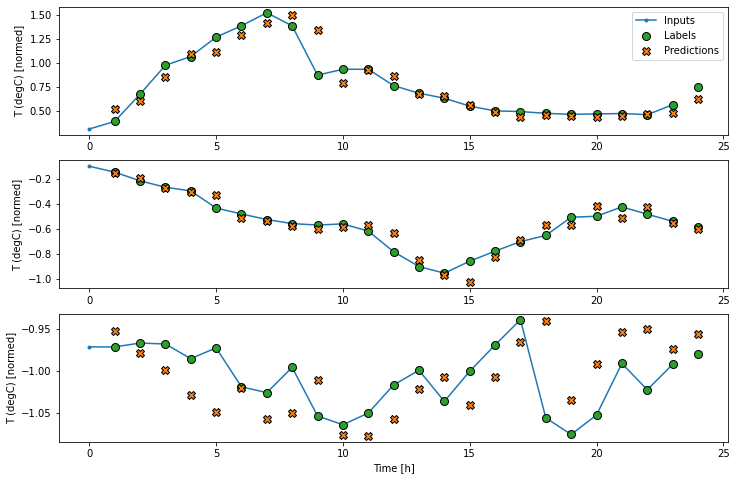

In [ ]:
wide_window.plot(lstm_model)

**Now we create Multi-output models.**

**The models so far all predicted a single output feature, T (degC), for a single time step.**

**All of these models can be converted to predict multiple features just by changing the number of units in the output layer and adjusting the training windows to include all features in the labels (example_labels).**




In [ ]:
# Multi-output models

# The models so far all predicted a single output feature, T (degC), for a single time step.
# All of these models can be converted to predict multiple features just by 
# changing the number of units in the output layer and adjusting the training 
# windows to include all features in the labels (example_labels)

single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

Epoch 1/100
1534/1534 [==============================] - 9s 5ms/step - loss: 0.1027 - mean_absolute_error: 0.1863 - val_loss: 0.0747 - val_mean_absolute_error: 0.1492
Epoch 2/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0733 - mean_absolute_error: 0.1449 - val_loss: 0.0722 - val_mean_absolute_error: 0.1428
Epoch 3/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.1402 - val_loss: 0.0701 - val_mean_absolute_error: 0.1376
Epoch 4/100
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.1375 - val_loss: 0.0692 - val_mean_absolute_error: 0.1358
Epoch 5/100
1534/1534 [==============================] - 10s 6ms/step - loss: 0.0701 - mean_absolute_error: 0.1354 - val_loss: 0.0697 - val_mean_absolute_error: 0.1358
Epoch 6/100
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.1340 - val_loss: 0.0681 - val_mean_absolute_error: 0.13

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)


Epoch 1/100
1533/1533 [==============================] - 28s 17ms/step - loss: 0.1297 - mean_absolute_error: 0.2106 - val_loss: 0.0701 - val_mean_absolute_error: 0.1410
Epoch 2/100
1533/1533 [==============================] - 26s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.1342 - val_loss: 0.0655 - val_mean_absolute_error: 0.1302
Epoch 3/100
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0643 - mean_absolute_error: 0.1276 - val_loss: 0.0637 - val_mean_absolute_error: 0.1259
Epoch 4/100
1533/1533 [==============================] - 24s 15ms/step - loss: 0.0632 - mean_absolute_error: 0.1249 - val_loss: 0.0633 - val_mean_absolute_error: 0.1243
Epoch 5/100
1533/1533 [==============================] - 24s 16ms/step - loss: 0.0625 - mean_absolute_error: 0.1233 - val_loss: 0.0626 - val_mean_absolute_error: 0.1225
Epoch 6/100
1533/1533 [==============================] - 24s 15ms/step - loss: 0.0621 - mean_absolute_error: 0.1222 - val_loss: 0.0623 - val_mean_absolute_

In [ ]:
# Multi-step models

# Both the single-output and multiple-output models in the previous sections made 
# single time step predictions, one hour into the future.

# In a multi-step prediction, the model needs to learn to predict a range of future values. 
# Thus, unlike a single step model, where only a single future point is predicted, 
# a multi-step model predicts a sequence of the future values.

# Two approaches
#   a) Single shot predictions where the entire time series is predicted at once
#   b) Autoregressive predictions where the model only makes single step predictions and 
#      its output is fed back as its input.

# Here, the models will learn to predict 24 hours into the future, given 24 hours of the past.

**Multi-step time series forecasting approach generates a forecast for multiple time steps at once. Multi-step time series forecasting is about modeling the distribution of future values of a signal over a prediction horizon.**

**In a multi-step prediction, the model needs to learn to predict a range of future values.**

**Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.**

**If we see we are settting the label width to be 24 along with the input width but the shift which is the stride is not 1, here the shift is also 24, as the shift is 24 the model will learn to predict 24 hours into the future given the previous 24 timesteps that 24 hours of past data.**


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

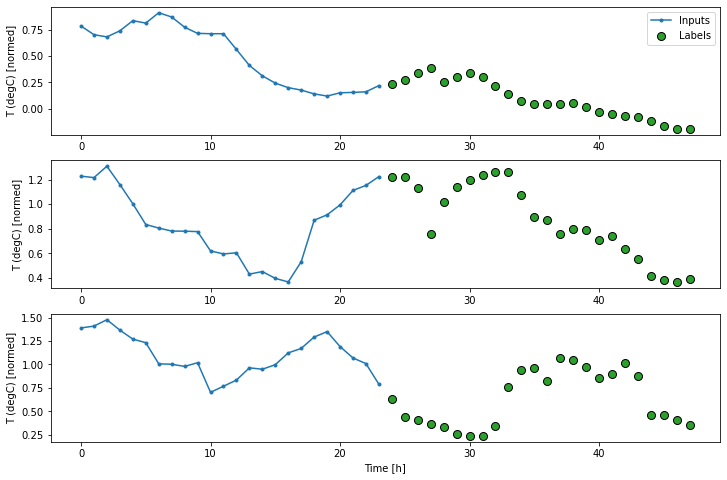

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [ ]:
# Single-shot models

**We create dense neural network for multi timestep prediction.**

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(64, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

Epoch 1/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2724 - mean_absolute_error: 0.3372 - val_loss: 0.2325 - val_mean_absolute_error: 0.2992
Epoch 2/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2287 - mean_absolute_error: 0.2949 - val_loss: 0.2288 - val_mean_absolute_error: 0.2938
Epoch 3/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2257 - mean_absolute_error: 0.2909 - val_loss: 0.2266 - val_mean_absolute_error: 0.2911
Epoch 4/100
1532/1532 [==============================] - 9s 6ms/step - loss: 0.2241 - mean_absolute_error: 0.2889 - val_loss: 0.2256 - val_mean_absolute_error: 0.2902
Epoch 5/100
1532/1532 [==============================] - 8s 5ms/step - loss: 0.2230 - mean_absolute_error: 0.2875 - val_loss: 0.2247 - val_mean_absolute_error: 0.2895
Epoch 6/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2222 - mean_absolute_error: 0.2865 - val_loss: 0.2251 - val_mean_absolute_error: 0.2

**Plotting the prediction along with the labels for the multi dense model which predicti for multiple steps in the future.**

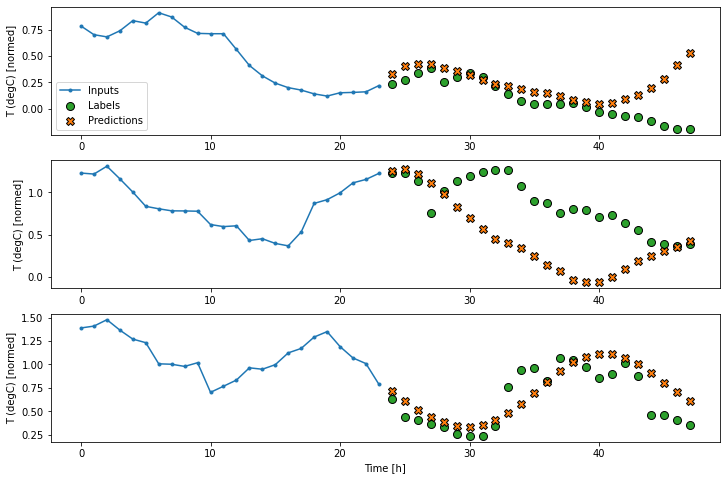

In [ ]:
multi_window.plot(multi_dense_model)

**Creating a CNN model for multi output prediction.**

**The kernel size is given as CONV_WIDTH which will take care of the input.**

**The conv1d layers considers the input data as something that comes in each time step.**

**It means that, irrespective of the no. of features, the conv1d function takes input as a 1-D quantity (consider time as input).**

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    # this code works since the kernel size is given as CONV_WIDTH which will take care of the input.
    # Assume we are feeding a three time step information to the network, say [0, 1, 2]
    # The kernel size is set to 3. It can convert the input data into a feature map
    # When we visualize the data as time x temperature (the feature that we considered in this problem),
    # The conv1d layers considers the input data as something that comes in each time step.
    # It means that, irrespective of the no. of features, the conv1d function takes input as a 1-D quantity (consider time as input) 
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)), 
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

Epoch 1/100
1532/1532 [==============================] - 12s 7ms/step - loss: 0.2422 - mean_absolute_error: 0.3102 - val_loss: 0.2293 - val_mean_absolute_error: 0.2983
Epoch 2/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2202 - mean_absolute_error: 0.2880 - val_loss: 0.2228 - val_mean_absolute_error: 0.2886
Epoch 3/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2165 - mean_absolute_error: 0.2842 - val_loss: 0.2210 - val_mean_absolute_error: 0.2877
Epoch 4/100
1532/1532 [==============================] - 11s 7ms/step - loss: 0.2134 - mean_absolute_error: 0.2811 - val_loss: 0.2193 - val_mean_absolute_error: 0.2875
Epoch 5/100
1532/1532 [==============================] - 10s 7ms/step - loss: 0.2112 - mean_absolute_error: 0.2792 - val_loss: 0.2164 - val_mean_absolute_error: 0.2834
Epoch 6/100
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2095 - mean_absolute_error: 0.2774 - val_loss: 0.2161 - val_mean_absolute_error:

**Model Summary**

In [ ]:
multi_conv_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 3, 19)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            14848     
                                                                 
 dense_16 (Dense)            (None, 1, 456)            117192    
                                                                 
 reshape_2 (Reshape)         (None, 24, 19)            0         
                                                                 
Total params: 132,040
Trainable params: 132,040
Non-trainable params: 0
_________________________________________________________________


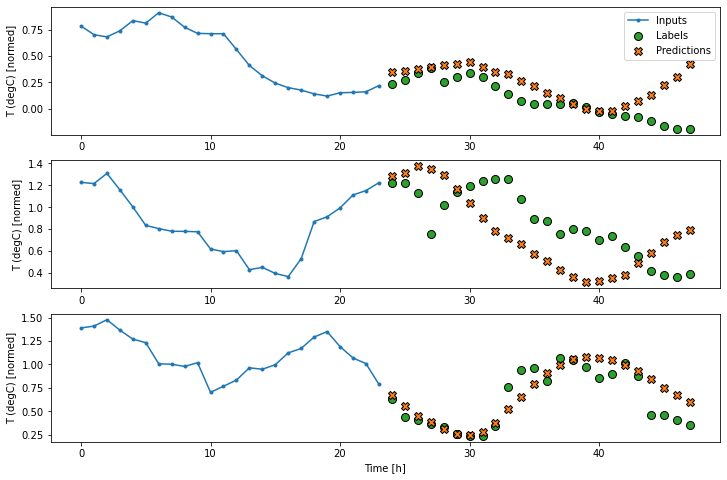

In [ ]:
multi_window.plot(multi_conv_model)

**LSTM model for multi time step prediction.**

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

Epoch 1/100
1532/1532 [==============================] - 25s 15ms/step - loss: 0.2915 - mean_absolute_error: 0.3617 - val_loss: 0.2299 - val_mean_absolute_error: 0.3055
Epoch 2/100
1532/1532 [==============================] - 24s 16ms/step - loss: 0.2167 - mean_absolute_error: 0.2937 - val_loss: 0.2211 - val_mean_absolute_error: 0.2938
Epoch 3/100
1532/1532 [==============================] - 23s 15ms/step - loss: 0.2090 - mean_absolute_error: 0.2847 - val_loss: 0.2193 - val_mean_absolute_error: 0.2905
Epoch 4/100
1532/1532 [==============================] - 24s 16ms/step - loss: 0.2047 - mean_absolute_error: 0.2801 - val_loss: 0.2164 - val_mean_absolute_error: 0.2871
Epoch 5/100
1532/1532 [==============================] - 24s 15ms/step - loss: 0.2016 - mean_absolute_error: 0.2772 - val_loss: 0.2150 - val_mean_absolute_error: 0.2855
Epoch 6/100
1532/1532 [==============================] - 25s 16ms/step - loss: 0.1995 - mean_absolute_error: 0.2752 - val_loss: 0.2141 - val_mean_absolute_

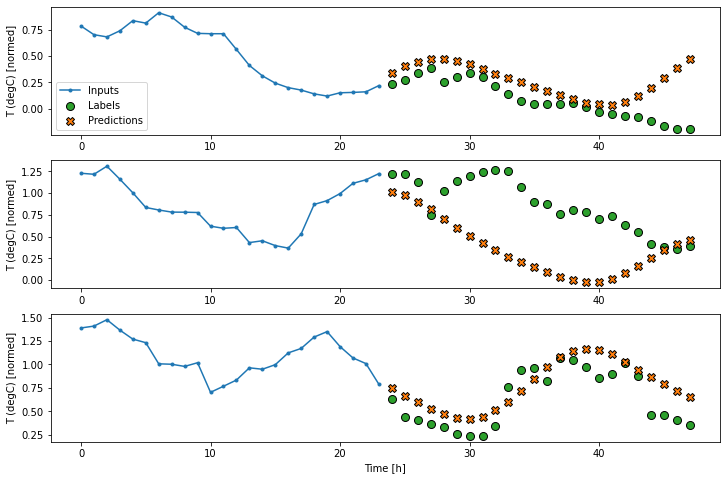

In [ ]:
multi_window.plot(multi_lstm_model)

**Creating an Autoregressive model.**

**Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems.**

In [ ]:
# Autoregressive model

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

**Creating an Autoregressive model with 32 units and out_steps to be 24.**

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
# The first method this model needs is a warmup method to initialize its 
# internal state based on the inputs. Once trained, this state will capture 
# the relevant parts of the input history. This is equivalent to the 
# single-step LSTM model from earlier.

def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

**Shape of the feedback_model**

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


**Fit & Compile the Feedback model, using Multi-window.**

In [87]:
history = compile_and_fit(feedback_model, multi_window)

Epoch 1/100
1532/1532 [==============================] - 41s 24ms/step - loss: 0.3153 - mean_absolute_error: 0.3855 - val_loss: 0.2498 - val_mean_absolute_error: 0.3291
Epoch 2/100
1532/1532 [==============================] - 34s 22ms/step - loss: 0.2334 - mean_absolute_error: 0.3156 - val_loss: 0.2424 - val_mean_absolute_error: 0.3179
Epoch 3/100
1532/1532 [==============================] - 33s 22ms/step - loss: 0.2239 - mean_absolute_error: 0.3047 - val_loss: 0.2334 - val_mean_absolute_error: 0.3076
Epoch 4/100
1532/1532 [==============================] - 34s 22ms/step - loss: 0.2179 - mean_absolute_error: 0.2982 - val_loss: 0.2265 - val_mean_absolute_error: 0.3022
Epoch 5/100
1532/1532 [==============================] - 34s 22ms/step - loss: 0.2135 - mean_absolute_error: 0.2939 - val_loss: 0.2256 - val_mean_absolute_error: 0.3000
Epoch 6/100
1532/1532 [==============================] - 35s 23ms/step - loss: 0.2099 - mean_absolute_error: 0.2906 - val_loss: 0.2294 - val_mean_absolute_

**plotting the predictions made by the auto regressive model along with the inputs for multi time step prediction.**

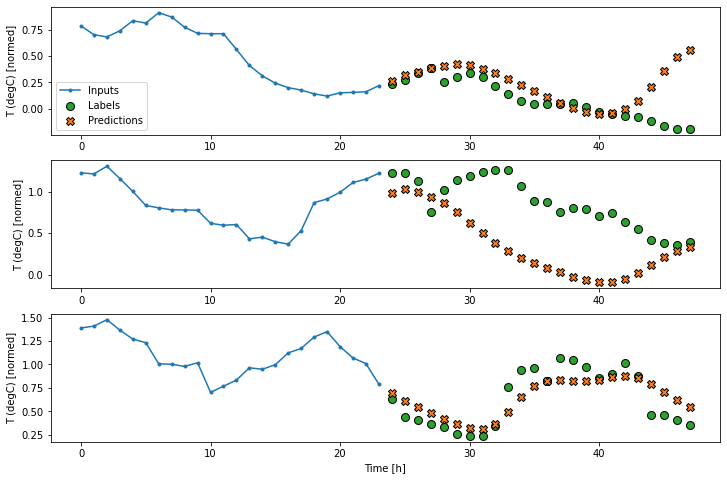

In [88]:
multi_window.plot(feedback_model)